In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from colorama import Fore, Style
from sklearn.model_selection import train_test_split

In [1]:
from src.data_preprocessing.preprocess import *
from src.settings.settings import *

Using device: cuda
CUDA available: True
CUDA version: 11.8
PyTorch version: 2.7.1+cu118


C:\Users\HP\PycharmProjects\25_Seddik\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
train_filename = "../../data_training/F-din.csv"
test_filename = "../../data_test_validation/F-din.csv"

df_train, df_val, df_test = load_datasets(train_filename,test_filename, test_size=0.5, fType="csv")


Shape of df_train:(50000, 4)
Shape of df_test:(12500, 4)
Shape of df_val:(12500, 4)


In [4]:
print(f"\n{Fore.RED}Shape of df_train:{Style.RESET_ALL}{df_train.shape}")
print(f"{Fore.RED}Shape of df_test:{Style.RESET_ALL}{df_val.shape}")
print(f"{Fore.RED}Shape of df_val:{Style.RESET_ALL}{df_test.shape}")


Shape of df_train:(50000, 4)
Shape of df_test:(12500, 4)
Shape of df_val:(12500, 4)


In [5]:
print(f"{Fore.RED}head of the data:{Style.RESET_ALL}\n{df_train.head()}")
print(f"\n{Fore.RED}Data types:{Style.RESET_ALL}\n{df_train.dtypes}")
print(f"\n{Fore.RED}Shape of the Dataset:{Style.RESET_ALL}\n{df_train.shape}")
print(f"\n{Fore.RED}Columns of the Data:{Style.RESET_ALL}\n{df_train.columns}")
print(f"\n{Fore.RED}Statistical Summary of the Data:{Style.RESET_ALL}\n{df_train.describe()}")
print(f"{Fore.RED}Do we have a Null values:{Style.RESET_ALL}\n{df_train.isnull().sum()}")
print(f"{Fore.RED}Unique values of uFac: {Style.RESET_ALL}\n{df_train["uFac"].unique()}")


head of the data:
        zen       azi  uFac       F_1
0  0.008501  0.000000   0.0  0.000052
1  0.016501  3.883222   0.0  0.000054
2  0.021732  1.483259   0.0  0.000052
3  0.025929  5.366481   0.0  0.000055
4  0.029535  2.966518   0.0  0.000052

Data types:
zen     float64
azi     float64
uFac    float64
F_1     float64
dtype: object

Shape of the Dataset:
(50000, 4)

Columns of the Data:
Index(['zen', 'azi', 'uFac', 'F_1'], dtype='object')

Statistical Summary of the Data:
                zen           azi          uFac           F_1
count  50000.000000  50000.000000  50000.000000  5.000000e+04
mean       0.999986      3.141132     50.000000  1.407415e-04
std        0.376307      1.813906     35.355693  2.988716e-04
min        0.008501      0.000000      0.000000  2.825069e-10
25%        0.722756      1.569941     25.000000  4.995151e-06
50%        1.047190      3.141385     50.000000  1.749765e-05
75%        1.318087      4.711262     75.000000  6.625791e-05
max        1.570746     

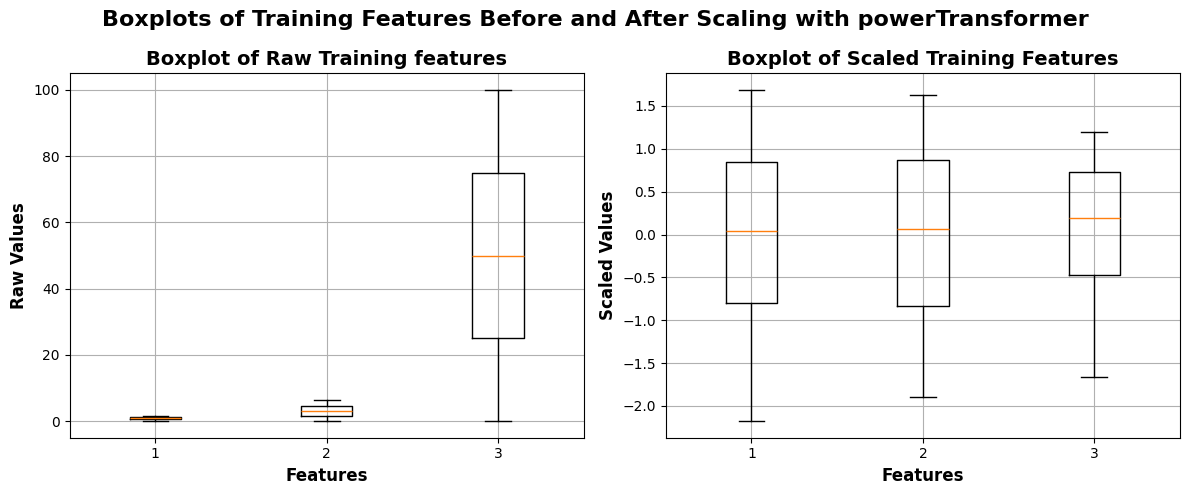

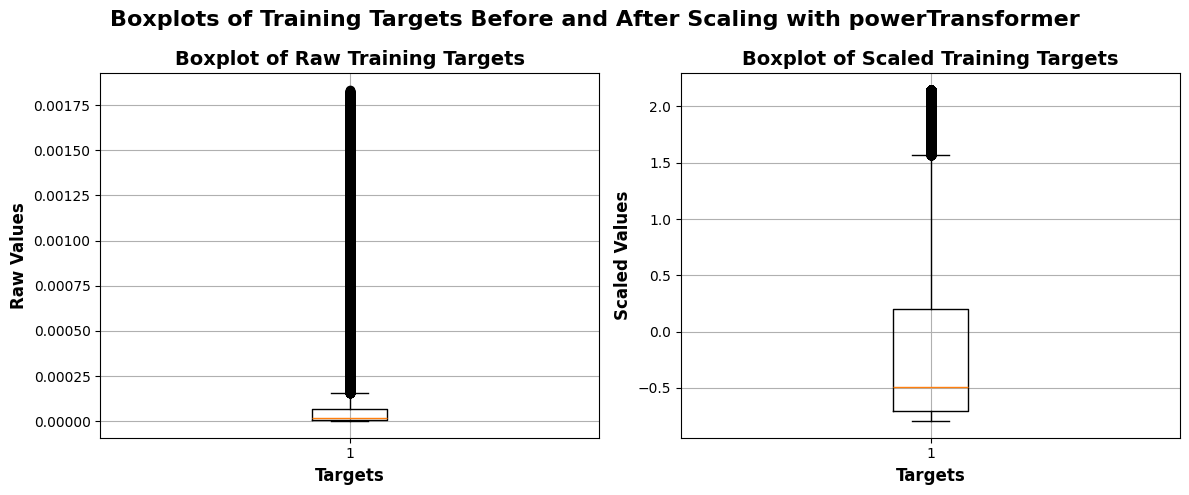

Shape of X_train:torch.Size([50000, 3])
Shape of y_train:torch.Size([50000, 1])
Shape of X_val:torch.Size([12500, 3])
Shape of y_val:torch.Size([12500, 1])
Shape of X_test:torch.Size([12500, 3])
Shape of y_test:torch.Size([12500, 1])


In [7]:
X_train, y_train, X_val, y_val, X_test, y_test, testData = prepare_data(df_train, df_val, df_test,
                                                                        normalization="standardScaler", # standardScaler, powerTransformer, minMaxScaler, robustScaler
                                                                        visualization="Training")

In [1]:
def avg(data):
    x= data + 1
    y = data + 3

    return x, y

In [5]:
len = 2
x, y = avg(5)
x /= len
y /= len
print(f"x: {x} \ny: {y}")

x: 3.0 
y: 4.0


from numpy to pandas

In [36]:
train_filename = "../../data_training/train_X4.npy"
dirpath = os.path.dirname(train_filename)
y_train_filename = os.path.join(dirpath, "train_y.npy")

test_filename = "../../data_test_validation/test_X4.npy"
y_test_filename = "../../data_test_validation/test_y.npy"

import numpy as np
import pandas as pd

X_train = np.load(train_filename, allow_pickle=True)
y_train = np.load(y_train_filename, allow_pickle=True)

X_test = np.load(test_filename, allow_pickle=True)
y_test = np.load(y_test_filename, allow_pickle=True)


X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)

columns = [f"sph_{x}" for x in range(X_train.shape[1])]
if X_train.shape[1] == 3 or "X2" in train_filename:
    columns[0] = "zen"
    columns[1] = "azi"
    columns[2] = "u"
elif X_train.shape[1] == 4 or "X4" in train_filename:
    columns[0] = "x"
    columns[1] = "y"
    columns[2] = "z"
    columns[3] = "u"

X_train_df.columns = columns
X_test_df.columns = columns

y_train_df.columns = ["target"]
y_test_df.columns = ["target"]

train = pd.concat([X_train_df, y_train_df], axis=1)
val_test = pd.concat([X_test_df, y_test_df], axis=1)

print(train.head(10))

          x         y         z         u     sph_4     sph_5     sph_6  \
0  0.008501  0.000000  0.999964  0.282095 -0.000000  0.488585  0.004153   
1 -0.012166 -0.011145  0.999864  0.282095 -0.005446  0.488536 -0.005945   
2  0.001900  0.021647  0.999764  0.282095  0.010577  0.488487  0.000928   
3  0.015774 -0.020575  0.999664  0.282095 -0.010053  0.488438  0.007707   
4 -0.029080  0.005144  0.999564  0.282095  0.002513  0.488389 -0.014208   
5  0.027626  0.017573  0.999464  0.282095  0.008586  0.488341  0.013498   
6 -0.009258 -0.034441  0.999364  0.282095 -0.016828  0.488292 -0.004524   
7 -0.017682  0.034045  0.999264  0.282095  0.016635  0.488243 -0.008639   
8  0.038404 -0.014025  0.999164  0.282095 -0.006853  0.488194  0.018764   
9 -0.039987 -0.016506  0.999064  0.282095 -0.008065  0.488145 -0.019538   

      sph_7     sph_8     sph_9  ...       sph_164       sph_165  \
0  0.000000 -0.000000  0.630715  ...  6.122706e-09  4.868918e-11   
1  0.000148 -0.012175  0.630526  ...  